In [ ]:
import pandas as pd 
cancer = pd.read_csv('cancer.csv')

In [ ]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.iloc[:, :-1],
                                                   cancer['Y'],
                                                   random_state=0,
                                                   stratify= cancer['Y'])

In [ ]:
X_train.shape

(426, 30)

In [ ]:
y_train.shape

(426,)

In [ ]:
X_test.shape

(143, 30)

In [ ]:
y_test.shape

(143,)

### Modeling

In [ ]:
from keras import models
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   #0/1 분류 

model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
x_val = X_train[:100]      # 검증용 x
partial_x_train = X_train[100:]   #학습용 x

y_val = y_train[:100]       # 검증용 y
partial_y_train = y_train[100:]    #학습용 y

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20, batch_size=10, 
                   validation_data=(x_val, y_val))

Epoch 1/20
33/33 [==============================] - 0s 6ms/step - loss: 46.9526 - accuracy: 0.6718 - val_loss: 0.5733 - val_accuracy: 0.8100
Epoch 2/20
33/33 [==============================] - 0s 1ms/step - loss: 0.8227 - accuracy: 0.8436 - val_loss: 0.2919 - val_accuracy: 0.9300
Epoch 3/20
33/33 [==============================] - 0s 1ms/step - loss: 0.8661 - accuracy: 0.8497 - val_loss: 0.6257 - val_accuracy: 0.8300
Epoch 4/20
33/33 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.8620 - val_loss: 0.5333 - val_accuracy: 0.8900
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.7487 - accuracy: 0.8528 - val_loss: 0.5067 - val_accuracy: 0.8900
Epoch 6/20
33/33 [==============================] - 0s 1ms/step - loss: 0.7427 - accuracy: 0.8466 - val_loss: 0.4490 - val_accuracy: 0.9300
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.8742 - val_loss: 0.3231 - val_accuracy: 0.9200
Epoch 8/20
33/33 [=

### 시각화

In [ ]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

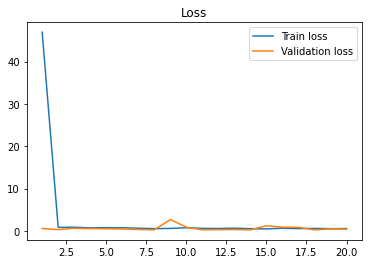

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Validation loss')
# plt.yscale('symlog')
plt.legend() 
plt.title('Loss')
plt.show()

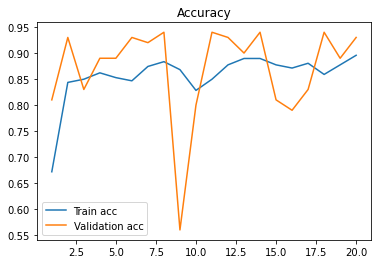

In [ ]:
plt.plot(epochs, acc, label='Train acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend() 
plt.title('Accuracy')
plt.show()

In [ ]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   #0/1 분류 

model.compile(loss='binary_crossentropy', optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=8, batch_size=10)

Epoch 1/8
43/43 [==============================] - 0s 673us/step - loss: 3.2526 - accuracy: 0.6009
Epoch 2/8
43/43 [==============================] - 0s 741us/step - loss: 2.1227 - accuracy: 0.6408
Epoch 3/8
43/43 [==============================] - 0s 724us/step - loss: 1.9214 - accuracy: 0.6526
Epoch 4/8
43/43 [==============================] - 0s 949us/step - loss: 1.6177 - accuracy: 0.7160
Epoch 5/8
43/43 [==============================] - 0s 766us/step - loss: 1.3371 - accuracy: 0.7347
Epoch 6/8
43/43 [==============================] - 0s 879us/step - loss: 1.3217 - accuracy: 0.7746
Epoch 7/8
43/43 [==============================] - 0s 762us/step - loss: 1.3099 - accuracy: 0.7676
Epoch 8/8
43/43 [==============================] - 0s 812us/step - loss: 0.8083 - accuracy: 0.8263


In [ ]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 998us/step - loss: 0.3095 - accuracy: 0.9091


[0.3095032870769501, 0.9090909361839294]

In [ ]:
(model.predict(X_test) > 0.5) * 1.

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],